In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
##read in csvs
constructors = pd.read_csv("constructors.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructors = constructors.drop(columns=['url']) #drop url column
constructors

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
206,209,manor,Manor Marussia,British
207,210,haas,Haas F1 Team,American
208,211,racing_point,Racing Point,British
209,213,alphatauri,AlphaTauri,Italian


In [3]:
#Merge constructor table with constructor standings
constructor_master = constructors.merge(constructor_standings,on='constructorId')
#constructor_master = constructor_master.merge(constructor_results,on=['constructorId','raceId'])
constructor_master

,constructorId,constructorRef,name,nationality,constructorStandingsId,raceId,points,position,positionText,wins
0,1,mclaren,McLaren,British,1,18,14.0,1,1,1
1,1,mclaren,McLaren,British,7,19,24.0,1,1,1
2,1,mclaren,McLaren,British,18,20,28.0,3,3,1
3,1,mclaren,McLaren,British,29,21,34.0,3,3,1
4,1,mclaren,McLaren,British,40,22,42.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...
12581,214,alpine,Alpine F1 Team,French,27740,1056,17.0,7,7,0
12582,214,alpine,Alpine F1 Team,French,27750,1057,25.0,7,7,0
12583,214,alpine,Alpine F1 Team,French,27760,1059,29.0,7,7,0
12584,214,alpine,Alpine F1 Team,French,27770,1058,31.0,7,7,0


In [4]:
##Create DataFrame consisting of races, driver standings, drivers and qualifying results
races = pd.read_csv("races.csv").drop(columns=['url'])
drivers = pd.read_csv("drivers.csv").drop(columns=['url'])
driver_standings = pd.read_csv("driver_standings.csv")
##merge races with driver standings and drivers
races_standings = races.merge(driver_standings,on=['raceId'])
races_standings = races_standings.merge(drivers,on=['driverId'])
#drop non-needed columns
races_standings = races_standings.drop(columns=['positionText','driverRef','name'])

#races_standings

In [5]:
#merge each drivers qualifying results on the race and driver id
qualifying = pd.read_csv('qualifying.csv')
qualifying = qualifying.rename(columns={'position':'qualifier_position'})
races_standings = races_standings.merge(qualifying,on=['raceId','driverId'])
races_standings2 = races_standings.loc[races_standings.raceId==1000]
races_standings2

,raceId,year,round,circuitId,date,time,driverStandingsId,driverId,points,position,wins,number_x,code,forename,surname,dob,nationality,qualifyId,constructorId,number_y,qualifier_position,q1,q2,q3
250,1000,2018,12,11,2018-07-29,13:10:00,68871,8,146.0,3,0,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,7760,6,7,3,1:17.526,1:32.762,1:36.186
606,1000,2018,12,11,2018-07-29,13:10:00,68869,20,189.0,2,4,5,VET,Sebastian,Vettel,1987-07-03,German,7761,6,5,4,1:16.666,1:28.636,1:36.210
1845,1000,2018,12,11,2018-07-29,13:10:00,68873,4,44.0,9,0,14,ALO,Fernando,Alonso,1981-07-29,Spanish,7768,1,14,11,1:18.208,1:35.214,NaN
3246,1000,2018,12,11,2018-07-29,13:10:00,68870,1,213.0,1,5,44,HAM,Lewis,Hamilton,1985-01-07,British,7778,131,44,1,1:17.419,1:31.242,1:35.658
3483,1000,2018,12,11,2018-07-29,13:10:00,68884,154,21.0,14,0,8,GRO,Romain,Grosjean,1986-04-17,French,7767,210,8,10,1:17.901,1:33.650,1:40.593
6102,1000,2018,12,11,2018-07-29,13:10:00,68875,807,52.0,7,0,27,HUL,Nico,Hülkenberg,1987-08-19,German,7770,4,27,13,1:17.905,1:36.506,NaN
6590,1000,2018,12,11,2018-07-29,13:10:00,68879,815,30.0,10,0,11,PER,Sergio,Pérez,1990-01-26,Mexican,7776,10,11,19,1:19.200,NaN,NaN
6784,1000,2018,12,11,2018-07-29,13:10:00,68872,817,118.0,5,2,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,7769,9,3,12,1:18.540,1:36.442,NaN
7106,1000,2018,12,11,2018-07-29,13:10:00,68876,822,132.0,4,0,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,7779,131,77,2,1:17.123,1:32.081,1:35.918
7322,1000,2018,12,11,2018-07-29,13:10:00,68885,825,45.0,8,0,20,MAG,Kevin,Magnussen,1992-10-05,Danish,7766,210,20,9,1:18.314,1:32.968,1:39.858


In [6]:
#Read results.csv
results = pd.read_csv('results.csv')


In [7]:
#only show top 10 (podium) of each race since 2010
#add in fastestLapTime, fastestLapSpeed, statusId of each driver in each race
races_standings = races_standings.sort_values(by=['raceId','position'])
races_standings = races_standings.loc[races_standings.year>=2010]
races_standings = races_standings.merge(results[['raceId','driverId','fastestLapTime','fastestLapSpeed','statusId']],on=['raceId','driverId'])
races_standings = races_standings.drop(columns=['code','number_y','dob'])
races_standings_top10 = races_standings.loc[races_standings.position<=10]

#races_standings.loc[races_standings.raceId==1000]
races_standings_top10

,raceId,year,round,circuitId,date,time,driverStandingsId,driverId,points,position,wins,number_x,forename,surname,nationality,qualifyId,constructorId,qualifier_position,q1,q2,q3,fastestLapTime,fastestLapSpeed,statusId
0,337,2010,1,3,2010-03-14,12:00:00,63737,4,25.0,1,1,14,Fernando,Alonso,Spanish,3328,6,3,1:54.612,1:54.172,1:54.608,1:58.287,191.706,1
1,337,2010,1,3,2010-03-14,12:00:00,63738,13,18.0,2,0,19,Felipe,Massa,Brazilian,3327,6,2,1:55.313,1:54.331,1:54.242,1:59.732,189.392,1
2,337,2010,1,3,2010-03-14,12:00:00,63739,1,15.0,3,0,44,Lewis,Hamilton,British,3329,1,4,1:55.341,1:54.707,1:55.217,1:59.560,189.665,1
3,337,2010,1,3,2010-03-14,12:00:00,63740,20,12.0,4,0,5,Sebastian,Vettel,German,3326,9,1,1:55.029,1:53.883,1:54.101,2:00.218,188.627,1
4,337,2010,1,3,2010-03-14,12:00:00,63741,3,10.0,5,0,6,Nico,Rosberg,German,3330,131,5,1:55.463,1:54.682,1:55.241,2:00.236,188.599,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,1060,2021,9,70,2021-07-04,13:00:00,70456,844,62.0,6,0,16,Charles,Leclerc,Monegasque,8905,6,12,1:04.906,1:04.600,\N,1:08.698,226.277,1
4775,1060,2021,9,70,2021-07-04,13:00:00,70458,832,60.0,7,0,55,Carlos,Sainz,Spanish,8904,6,11,1:04.596,1:04.559,\N,1:07.762,229.402,1
4776,1060,2021,9,70,2021-07-04,13:00:00,70457,817,40.0,8,0,3,Daniel,Ricciardo,Australian,8906,1,13,1:04.977,1:04.719,\N,1:08.820,225.876,1
4777,1060,2021,9,70,2021-07-04,13:00:00,70467,842,39.0,9,0,10,Pierre,Gasly,French,8899,213,6,1:04.841,1:04.412,1:04.107,1:08.146,228.110,1


In [8]:
lap_times = pd.read_csv('lap_times.csv')
lap_times = lap_times.drop(columns=['lap','position','time'])
lap_times = lap_times.groupby(['raceId','driverId']).mean().reset_index()
lap_times = lap_times.rename(columns={"milliseconds": "avgLapTimeMS"})
lap_times2 = lap_times[lap_times.raceId==1035]
#lap_times2 

In [9]:
#Merge average laptime with main table
races_standings = races_standings.merge(lap_times[['raceId','driverId','avgLapTimeMS']],on=['raceId','driverId'])
#races_standings[races_standings.raceId==1035]


In [10]:
pit_stops = pd.read_csv('pit_stops.csv')
pit_stops_avg_time = pit_stops.drop(columns=['lap','time','duration','stop'])
pit_stops_avg_time = pit_stops_avg_time.groupby(['raceId','driverId']).mean().reset_index()
#pit_stops_avg_time

In [11]:
pit_stops_total = pit_stops.drop(columns=['lap','time','duration','milliseconds'])
pit_stops_total = pit_stops_total.groupby(['raceId','driverId']).max().reset_index()
#pit_stops_total[pit_stops_total.raceId==841]

In [12]:
pit_stops = pit_stops_avg_time.merge(pit_stops_total[['raceId','driverId','stop']], on=['raceId','driverId'])
pit_stops = pit_stops.rename(columns={"milliseconds":"avgPitStopTimeMS","stop":"totalPitStops"})
pit_stops

,raceId,driverId,avgPitStopTimeMS,totalPitStops
0,841,1,23213.0,2
1,841,2,24046.0,2
2,841,3,23716.0,1
3,841,4,24055.0,3
4,841,5,24865.0,1
...,...,...,...,...
4059,1060,847,21606.0,1
4060,1060,849,21152.0,1
4061,1060,852,23874.5,2
4062,1060,853,22591.0,2


In [13]:
def convertToMS(timestamp):
    #print(type(timestamp))
    timestamp = str(timestamp)
    time_in_ms=9999999
    if( len(timestamp)>4 ):
        timestamp = timestamp.replace('.',':')
        splat = timestamp.split(':')
        #print(splat[0])
        time_in_ms = int(splat[0])*60000
        time_in_ms = time_in_ms+(int(splat[1])*1000)
        time_in_ms = time_in_ms+(int(splat[2]))
        #print(time_in_ms)
    
    return time_in_ms

In [14]:
#Merge average pitstop times, and total pitstops with main table
races_standings = races_standings.merge(pit_stops[['raceId','driverId','avgPitStopTimeMS','totalPitStops']], on=['raceId','driverId'])
#print(races_standings[races_standings.circuitId==14].q3.unique())
races_standings['q1'] = races_standings['q1'].apply(convertToMS)
races_standings['q2'] = races_standings['q2'].apply(convertToMS)
races_standings['q3'] = races_standings['q3'].apply(convertToMS)
races_standings['fastestQualifyingLapinMS'] = races_standings[['q1','q2','q3']].min(axis=1)
races_standings['fastestLapTimeinMS'] = races_standings['fastestLapTime'].apply(convertToMS)
races_standings = races_standings.drop(columns=['fastestLapTime','q1','q2','q3'])
#ms = convertToMS("1:24.323")
#print(ms)






In [15]:
##CREATE DATAFRAME OF ALL FEATURES OF RACES ON MONZA raceId = 14
monza_features = races_standings#[races_standings.circuitId==14]
monza_features = monza_features.drop(columns=['year','round','circuitId','date','time','driverStandingsId','driverId','forename','surname','qualifyId','constructorId','number_x'])
monza_features

,raceId,points,position,wins,nationality,qualifier_position,fastestLapSpeed,statusId,avgLapTimeMS,avgPitStopTimeMS,totalPitStops,fastestQualifyingLapinMS,fastestLapTimeinMS
0,841,25.0,1,1,German,1,212.488,1,92590.672414,23319.500000,2,83529,89844
1,841,18.0,2,0,British,2,211.382,1,92975.103448,23213.000000,2,84307,90314
2,841,15.0,3,0,Russian,6,211.969,1,93117.568966,25109.000000,2,85247,90064
3,841,12.0,4,0,Spanish,5,213.336,1,93138.465517,24055.000000,3,84974,89487
4,841,10.0,5,0,Australian,3,213.066,1,93248.793103,24058.666667,3,84395,89600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,1060,1.0,16,0,Italian,15,225.149,11,72450.871429,24125.500000,2,64782,69042
4038,1060,0.0,17,0,British,9,225.613,11,72160.271429,21606.000000,1,64553,68900
4039,1060,0.0,18,0,German,19,224.007,12,73050.826087,21798.000000,1,65427,69394
4040,1060,0.0,19,0,Russian,20,222.842,12,73790.971014,22591.000000,2,65951,69757


In [16]:
monza_features = monza_features[monza_features.raceId==987]
monza_features

,raceId,points,position,wins,nationality,qualifier_position,fastestLapSpeed,statusId,avgLapTimeMS,avgPitStopTimeMS,totalPitStops,fastestQualifyingLapinMS,fastestLapTimeinMS
2734,987,345.0,1,9,British,20,215.914,1,77348.309859,20115.000000,4,9999999,71845
2735,987,302.0,2,5,German,2,213.849,1,77271.295775,19373.000000,4,68360,72539
2736,987,280.0,3,2,Finnish,1,214.064,1,77310.197183,19348.000000,4,68322,72466
2737,987,200.0,4,1,Australian,5,215.363,1,77957.084507,21372.000000,4,69330,72029
2738,987,193.0,5,0,Finnish,3,213.987,1,77336.084507,19730.000000,4,68538,72492
2739,987,158.0,6,2,Dutch,4,218.349,1,77735.239437,20116.200000,5,68925,71044
2740,987,94.0,7,0,Mexican,6,212.347,1,78250.169014,19368.250000,4,69598,73052
2741,987,54.0,9,0,Spanish,9,210.694,11,78720.371429,19927.250000,4,69768,73625
2742,987,42.0,10,0,Brazilian,10,211.190,1,78241.464789,19248.500000,4,69612,73452
2743,987,40.0,11,0,Canadian,18,215.863,12,80178.681159,20916.600000,5,70776,71862


In [17]:
monza_features['PointsOrNot'] = np.where(monza_features['position']<=10,'W','L')
monza_features

/var/folders/zx/rg1xxfp949vfdzf6t4v3vm8h0000gn/T/ipykernel_25225/3285241009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monza_features['PointsOrNot'] = np.where(monza_features['position']<=10,'W','L')


,raceId,points,position,wins,nationality,qualifier_position,fastestLapSpeed,statusId,avgLapTimeMS,avgPitStopTimeMS,totalPitStops,fastestQualifyingLapinMS,fastestLapTimeinMS,PointsOrNot
2734,987,345.0,1,9,British,20,215.914,1,77348.309859,20115.000000,4,9999999,71845,W
2735,987,302.0,2,5,German,2,213.849,1,77271.295775,19373.000000,4,68360,72539,W
2736,987,280.0,3,2,Finnish,1,214.064,1,77310.197183,19348.000000,4,68322,72466,W
2737,987,200.0,4,1,Australian,5,215.363,1,77957.084507,21372.000000,4,69330,72029,W
2738,987,193.0,5,0,Finnish,3,213.987,1,77336.084507,19730.000000,4,68538,72492,W
2739,987,158.0,6,2,Dutch,4,218.349,1,77735.239437,20116.200000,5,68925,71044,W
2740,987,94.0,7,0,Mexican,6,212.347,1,78250.169014,19368.250000,4,69598,73052,W
2741,987,54.0,9,0,Spanish,9,210.694,11,78720.371429,19927.250000,4,69768,73625,W
2742,987,42.0,10,0,Brazilian,10,211.190,1,78241.464789,19248.500000,4,69612,73452,W
2743,987,40.0,11,0,Canadian,18,215.863,12,80178.681159,20916.600000,5,70776,71862,L


In [18]:
X=monza_features.drop(columns=['raceId','PointsOrNot','nationality']).reset_index()
X=X.drop(columns=['index','position','statusId','qualifier_position','wins','points'])
X#=X.replace({'\N': '0'}, regex=True)
#X

,fastestLapSpeed,avgLapTimeMS,avgPitStopTimeMS,totalPitStops,fastestQualifyingLapinMS,fastestLapTimeinMS
0,215.914,77348.309859,20115.000000,4,9999999,71845
1,213.849,77271.295775,19373.000000,4,68360,72539
2,214.064,77310.197183,19348.000000,4,68322,72466
3,215.363,77957.084507,21372.000000,4,69330,72029
4,213.987,77336.084507,19730.000000,4,68538,72492
5,218.349,77735.239437,20116.200000,5,68925,71044
6,212.347,78250.169014,19368.250000,4,69598,73052
7,210.694,78720.371429,19927.250000,4,69768,73625
8,211.190,78241.464789,19248.500000,4,69612,73452
9,215.863,80178.681159,20916.600000,5,70776,71862


In [19]:
Y = pd.DataFrame()
Y=monza_features['PointsOrNot']
Y

2734    W
2735    W
2736    W
2737    W
2738    W
2739    W
2740    W
2741    W
2742    W
2743    L
2744    L
2745    L
2746    L
2747    L
2748    L
2749    L
2750    L
Name: PointsOrNot, dtype: object

In [20]:
features = list(X.columns.values)
print(features)

['fastestLapSpeed', 'avgLapTimeMS', 'avgPitStopTimeMS', 'totalPitStops', 'fastestQualifyingLapinMS', 'fastestLapTimeinMS']


In [21]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

k=5
clf = tree.DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, Y, cv=k)
scores


array([0.75      , 0.75      , 1.        , 0.33333333, 0.33333333])

In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), (scores.std() * 2)/k**(1/2)))
scores.mean()

Accuracy: 0.63 (+/- 0.23)


0.6333333333333334

In [23]:
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

[6.0, 4.0]


TRAIN: [ 0  2  3  4  5  7 10 11 12 13 14 15 16] TEST: [1 6 8 9]
model score =  0.5
Average K-Fold Score : 0.6333333333333334


TypeError: 'builtin_function_or_method' object is not subscriptable

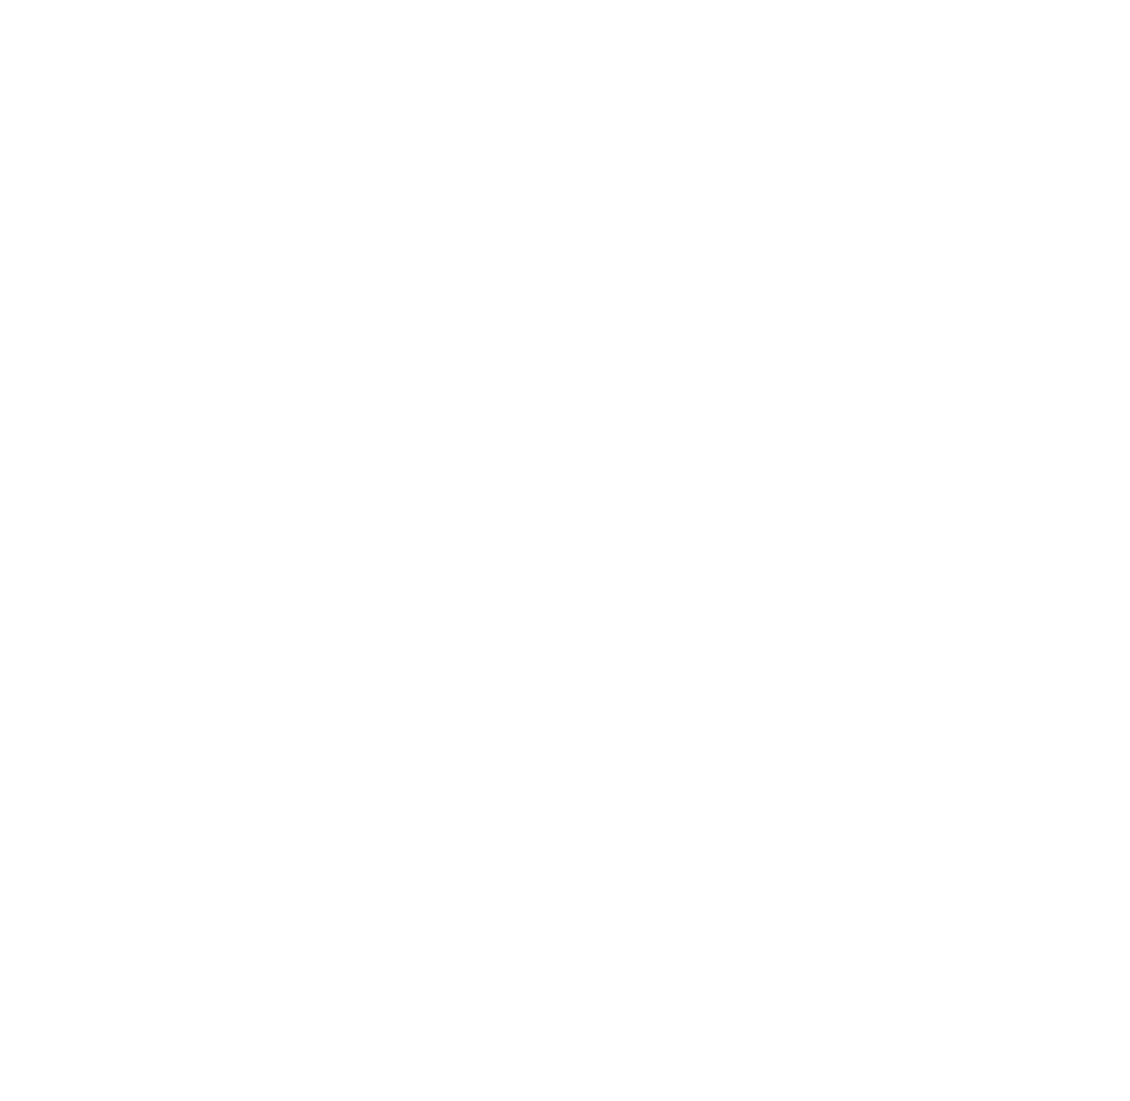

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = k, shuffle = True, random_state = 0)
i=0
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model score = ",model.score(x_test,y_test))
    print('Average K-Fold Score :' , np.mean(scores)) 
    #plt.figure()
    x = tree.plot_tree(model,rounded=True,filled=True,class_names=sorted,feature_names=features) 